# Commercial Bank Customer Retention Prediction

## APSTA-GE.2401: Statistical Consulting

## Scripts

Created on: 12/07/2020

Modified on: 12/07/2020

## Exploratory Data Analysis (EDA)

----

### Description

This script contains the EDA section of data analysis. 

Data path: `../data/preprocess/`

### Data

The data we imported are: 

- `X_train.csv`: contains all features in Q3 and Q4 of 2019 for training. Imported as `X`.
- `y_train.csv`: contains the label variable for validation. Imported as `y`.
- `X_test.csv`: contains all features in Q1 of 2020 for testing. Imported as `X_true`.

After importing the data, we confirmed that both train sets have the same number of records: **145296**. We also confirmed that the testing set has **76722** records.

### Research Design

The strategy of supervised learning is to train models using the `X_train` data and validate model performance using the `y_train` data. After training, we fit the model to the `X_test` data. The model will then generate predictions, `y_test`, based on `X_test`. 

To increase model performance, we splited the train set into two sets: 80% of the train data goes to the `X_train` set and 20% of the data goes to the `X_test` set. Then, we conducted a 5-fold cross validation and selected the best performed model output. We also find tuned hyperparameters using randomized search.

### Details on EDA



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, GridSpec
import seaborn as sns

print('SUCCESS! All modules are imported.')

SUCCESS! All modules are imported.


In [2]:
X = pd.read_csv('../data/X_train.csv')
y = pd.read_csv('../data/y_train.csv')
X_true = pd.read_csv('../data/X_test.csv')

In [3]:
X_raw = pd.read_csv('../data/preprocess/X_train.csv')

In [4]:
print('The proprocessed train set has {} rows and {} columns.'.format(X.shape[0], X.shape[1]))
print('The proprocessed validation set has {} rows and {} columns.'.format(y.shape[0], y.shape[1]))
print('The proprocessed test set has {} rows and {} columns.'.format(X_true.shape[0], X_true.shape[1]))

The proprocessed train set has 145296 rows and 78 columns.
The proprocessed validation set has 145296 rows and 2 columns.
The proprocessed test set has 76722 rows and 78 columns.


----

## Features

We first inspected features in the train set.

1. There are 77 features in the feature set. 
2. We checked the correlation among features and the label. 


### Dimensions

In [9]:
X.shape

(145296, 78)

In [10]:
print('There are {} columns in the feature set.'.format(X.shape[1]))
X.columns

There are 78 columns in the feature set.


Index(['cust_no', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B7', 'E15', 'E17', 'C1', 'C2', 'I1', 'I2', 'I4',
       'I6', 'I7', 'I11', 'I16', 'I17', 'I18', 'I19', 'I20', 'B6_y', 'B6_m',
       'B6_d', 'E1_y', 'E1_m', 'E1_d', 'E2_y', 'E2_m', 'E2_d', 'E3_y', 'E3_m',
       'E3_d', 'E4_y', 'E4_m', 'E4_d', 'E5_y', 'E5_m', 'E5_d', 'E6_y', 'E6_m',
       'E6_d', 'E10_y', 'E10_m', 'E10_d', 'E14_y', 'E14_m', 'E14_d', 'E16_y',
       'E16_m', 'E16_d', 'E18_y', 'E18_m', 'E18_d', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
      dtype='object')

### Descriptive Analysis

In [7]:
X['X1'].describe()

count    1.452960e+05
mean     2.100153e+05
std      2.085014e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.200000e+05
max      1.918000e+08
Name: X1, dtype: float64

# plt.hist(x=1, bins=10, density=True)
plt.show()

/Users/Jinink/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later
  


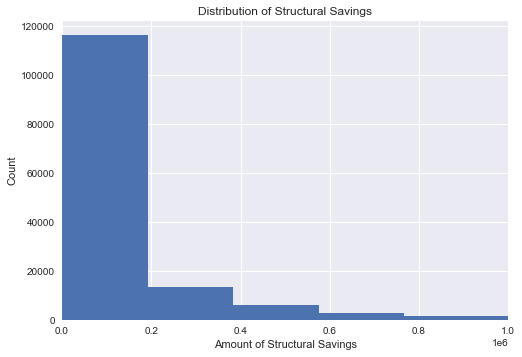

In [55]:
plt.style.use('seaborn')
n, bins, patches = plt.hist(x=X['X1'], bins=1000, density=False)
plt.xlim(0, 1000000)
plt.xlabel('Amount of Structural Savings')
plt.ylabel('Count')
plt.title('Distribution of Structural Savings')
plt.grid(True)
plt.savefig('../results/structural_savings.png', dpi=100, bbox_tight=True)
plt.show()

In [17]:
X['X2'].describe()

count    1.452960e+05
mean     1.564474e+04
std      1.204459e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.320671e+08
Name: X2, dtype: float64

In [18]:
X['X3'].describe()

count    1.452960e+05
mean     3.845892e+04
std      6.380324e+05
min      0.000000e+00
25%      5.069000e+01
50%      1.000670e+03
75%      7.340833e+03
max      1.420225e+08
Name: X3, dtype: float64

In [26]:
X['B2'].describe()

count    145296.000000
mean          1.466702
std           8.612308
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1152.000000
Name: B2, dtype: float64

In [28]:
X['B3'].describe()

count    1.452960e+05
mean     2.372900e+05
std      4.966519e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.700000e+04
max      9.072123e+08
Name: B3, dtype: float64

/Users/Jinink/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later
  


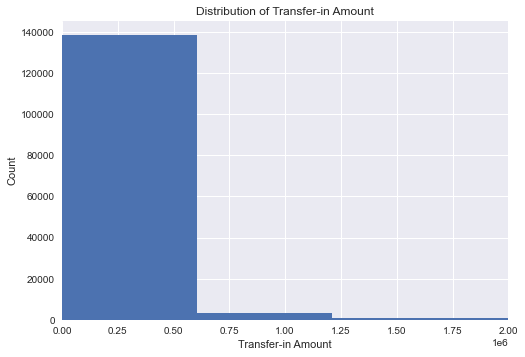

In [68]:
plt.style.use('seaborn')
n, bins, patches = plt.hist(x=X['B3'], bins=1500, density=False)
plt.xlim(0, 2e6)
plt.xlabel('Transfer-in Amount')
plt.ylabel('Count')
plt.title('Distribution of Transfer-in Amount')
plt.grid(True)
plt.savefig('../results/monthly_transfer_in.png', dpi=100, bbox_tight=True)
plt.show()

In [69]:
X['C1'].describe()

count    1.452960e+05
mean     3.375237e+05
std      2.388482e+06
min      0.000000e+00
25%      2.914863e+03
50%      5.025255e+04
75%      2.900042e+05
max      1.918000e+08
Name: C1, dtype: float64

/Users/Jinink/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later
  


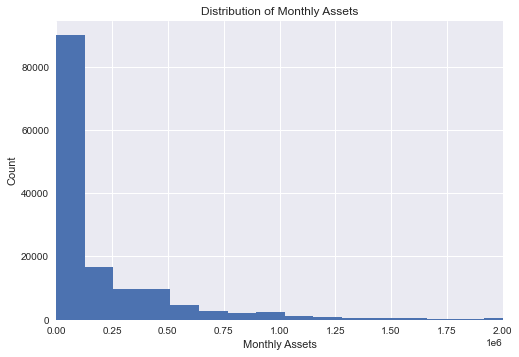

In [70]:
plt.style.use('seaborn')
n, bins, patches = plt.hist(x=X['C1'], bins=1500, density=False)
plt.xlim(0, 2e6)
plt.xlabel('Monthly Assets')
plt.ylabel('Count')
plt.title('Distribution of Monthly Assets')
plt.grid(True)
plt.savefig('../results/monthly_assets.png', dpi=100, bbox_tight=True)
plt.show()

### Correlation

In [14]:
Xfull = X_raw.merge(y, how='left', on='cust_no')
corrMatrix = Xfull.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

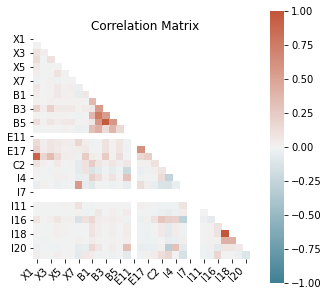

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(
    corrMatrix,
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)
ax.set_title('Correlation Matrix')
fig.savefig('../results/correlation_matrix.png', dpi=100)